# 1er Parcial IA

**Estu:** Itzel Emily Velasquez Guerra
**Carrera:** Ing. Diseño y animacion digital

**Enlace del dataset:**  [MNIST Personalizado MNIST](https://www.kaggle.com/datasets/elskowaski/custom-mnist)

El dataset Ya viene dividido en dos archivos, uno de train y otro de test

Al ser un data set en csv las columnas usadas para la realización de la clasificación:

*   **Entrada:**  784 columnas, que tienen los pixeles de las imágenes a escala de grises con valores que van desde el 0 al 255.
*   **Salida:**
Etiqueta que va del 0 al 9,



## Implementacion de librerias necesarias


In [ ]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Manejo de datos
import pandas as pd

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# Librería para realizar gráficos
import matplotlib.pyplot as plt

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline


In [ ]:
# Importación de archivos desde la nube de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1 Cargamos los datos de entrenamiento


`input_layer_size  = 784`
En esta linea definimos el tamaño de nuestra imagen, que es el resultado de 28 x 28

------------------------------------------------


`num_labels = 10`
Es la cantidad de etiquetas que contiene nuestro dataset


In [ ]:
# Las imágenes con las que trabajamos son de dígitos de 28x28
input_layer_size  = 784

# Tenemos 10 etiquetas lo cual seria: (0-9)
num_labels = 10

#  Cargamos los datos de entrenamiento
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/train2.csv')

# Asignamos valores a X y Y
X = data.iloc[:20000, 1:785].values
y = data.iloc[:20000, 0].values

m = y.size

# Comprobamos los tamaños
print("Tamaño de X: ", X.shape)
print("Tamaño de Y: ",  y.shape)

#display(data)
data.head()

Tamaño de X:  (20000, 784)
Tamaño de Y:  (20000,)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




```
EtiquetaY = data['label'].unique()
```
 `data['label']:`  Esta parte selecciona la columna llamada label del DataFrame data. Es como aislar esa columna específica para su análisis.

 `.unique():` Este es un método que opera en una Serie de PANDAS. Identifica todos los valores distintos presentes en esa columna, eliminando cualquier duplicado.


### PUNTO 1 : *Inserte atributos que contengan, caracteres, texto, valores booleanos relacionados a la temática del dataset elegido.*






In [ ]:
EtiquetaY = data['label'].unique() #Obtenemos todos los valores unicos de la columna 'label'

#Mostramos la lista de valores unicos y la cantidad de estos
print("Y sin alteracion: ", EtiquetaY)
print("Tamaño de y: ", len( EtiquetaY))
print("-" * 60)

#Ordenamos los valores de manera ascendente
EtiquetaY = np.sort(EtiquetaY)
print("Y ordenado: ", EtiquetaY)

Y sin alteracion:  [5 0 4 1 9 2 3 6 7 8]
Tamaño de y:  10
------------------------------------------------------------
Y ordenado:  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
Nom_Etiquetas = ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]
#Nom_Etiquetas[0]
for i in range(10):
  print( "Etiqueta: ",EtiquetaY[i] , " = ",  Nom_Etiquetas[i])

Etiqueta:  0  =  Zero
Etiqueta:  1  =  One
Etiqueta:  2  =  Two
Etiqueta:  3  =  Three
Etiqueta:  4  =  Four
Etiqueta:  5  =  Five
Etiqueta:  6  =  Six
Etiqueta:  7  =  Seven
Etiqueta:  8  =  Eight
Etiqueta:  9  =  Nine


## Insertar atributos





In [ ]:
df = pd.DataFrame(data)

In [ ]:
"""# Añadir columna de color predominante (asignación aleatoria de ejemplo)
Lugares = ['Negro', 'Blanco', 'Rojo', 'Azul', 'Verde', 'Amarillo', 'Gris']
data['Origen'] = np.random.choice(Lugares, len(data))"""

# Añadir columna de material (asignación coherente con clases)
Emociones = {
    0: 'Neutralidad', 1: 'Soledad', 2: 'Dudas', 3: 'Optimismo', 4: 'Estabilidad', 5: 'Aventura',
    6: 'Armonía', 7: 'Armonía', 8: 'Infinito', 9: 'Completitud'
}
df['Emocion'] = df['label'].map(Emociones)

# Añadir columna de su parentezco con alguna letra del abecedario
Parentezco_Literal = {
    0: 'O', 1: 'I', 2: 'Z', 3: 'E', 4: 'A', 5: 'S',
    6: 'G', 7: 'T', 8: 'B', 9: 'g'
}
df['Literal'] = df['label'].map(Parentezco_Literal)

# Crear la columna 'Clas_Tamanio' usando np.where para hacer las clasificaciones más simples
df['Clas_Tamanio'] = np.where(df['label'] <= 4, 'Smll',
                       np.where(df['label'] == 5, 'Medium', 'Large'))

# Crear la columna 'EsPar?' usando una función lambda (equivalente a la función es_par)
df['Is_Par'] = df['label'].apply(lambda x: x % 2 == 0)

# Mostrar las primeras filas del dataset actualizado
print("\nDataset con Columnas Adicionales:")
print(df.head())


Dataset con Columnas Adicionales:
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      5     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1      0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2      4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3      1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4      9     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel8  ...  pixel778  pixel779  pixel780  pixel781  pixel782  pixel783  \
0     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

       Emocion  Literal  Clas_Tamanio  

In [ ]:
df = pd.DataFrame(data)

## Duplicacion

In [ ]:
print("Tamaño de X original: ", X.shape)
print("Tamaño de y original: ", y.shape)
print(df.shape)

Tamaño de X original:  (20000, 784)
Tamaño de y original:  (20000,)
(60000, 785)


In [ ]:
def duplicar_dataset(X, y, min_val = 0, max_val = 1):

    df_copia = df.copy()

    # Normalizar los datos originales
    X_norm = (X - X.min()) / (X.max() - X.min()) * (max_val - min_val) + min_val

    # Duplicar los datos originales
    X_dup = X_norm.copy()
    y_dup = y.copy()

    # Añadir pequeñas variaciones aleatorias a las imágenes
    noise = np.random.normal(0, 0.1, X.shape)  # Variaciones pequeñas
    X_dup = np.clip(X_dup + noise, 0, 255)  # Asegura valores válidos de píxeles

    # Convertir las variaciones a enteros
    #X_dup = np.round(X_dup).astype(int)

    # Concatenar dataset original con el duplicado
    X_synthetic = np.vstack((X, X_dup))
    y_synthetic = np.concatenate((y, y_dup))

    return X_synthetic, y_synthetic

In [ ]:
X_original = df.drop(['label', 'Emocion', 'Literal', 'Clas_Tamanio', 'Is_Par'], axis=1).iloc[:20000].values / 255.0 # Normalización
y_original = df['label'].iloc[:20000].values

print(X_original.shape)
print(y_original.shape)

KeyError: "['Emocion', 'Literal', 'Clas_Tamanio', 'Is_Par'] not found in axis"

In [ ]:
X_original = df.drop(['label'], axis=1).iloc[:20000].values / 255.0 # Normalización
y_original = df['label'].iloc[:20000].values

print(X_original.shape)
print(y_original.shape)

(20000, 784)
(20000,)


In [ ]:
X_sintetico, y_sintetico = duplicar_dataset(X_original, y_original)

# Verificamos el tamaño
print(X_sintetico.shape)
print(y_sintetico.shape)

(40000, 784)
(40000,)


In [ ]:
print(X_original[:5])          # Muestra las primeras filas del dataset original
print(X_sintetico[27455:27460])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.00000000e+00 9.48712121e-02 0.00000000e+00 ... 2.02070232e-02
  0.00000000e+00 1.72850027e-01]
 [4.38999221e-02 4.28218396e-02 0.00000000e+00 ... 5.18566382e-02
  7.56639656e-02 0.00000000e+00]
 [1.52043955e-02 0.00000000e+00 0.00000000e+00 ... 1.26687414e-04
  9.28332327e-02 1.70180096e-01]
 [0.00000000e+00 5.14265136e-02 9.49058040e-02 ... 9.98150936e-02
  2.26385147e-02 0.00000000e+00]
 [0.00000000e+00 5.28128319e-02 1.44698719e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [ ]:
data_sintetico = [[i, j] for i, j in zip(y_original, X_original)]
print(data_sintetico)

Buffered data was truncated after reaching the output size limit.

In [ ]:
"""data_sintetico = [[i, j] for i, j in zip(X_original, y_original)]  # Combina x e y en una lista de listas

df = pd.DataFrame(data_sintetico, header=None)
print(df)"""

## VISUALIZACION

In [ ]:
labels = data['label']
images = data.drop('label', axis=1).values  # Obtener solo los valores de los píxeles

# Convertir las imágenes a un formato de 28x28
#images_reshaped = images.reshape(-1, 28, 28)

In [ ]:
# Imprimir algunas imágenes originales y rotadas para verificación
num_images = 4  # Número de imágenes a mostrar

plt.figure(figsize=(10, 4))
for i in range(num_images):
    # Mostrar imagen original
    plt.subplot(2, num_images, i + 1)
    # Reshape the image to 28x28
    plt.imshow(X_original[i].reshape(28, 28), cmap='gray')
    plt.title(f'Original - Etiqueta: {labels[i]}')
    plt.axis('off')

    # Mostrar imagen Sistematica
    plt.subplot(2, num_images, i + 1 + num_images)
    # Reshape the image to 28x28
    plt.imshow(X_sintetico[i].reshape(28, 28), cmap='gray')
    plt.title(f'Sintetica - Etiqueta: {labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

UNIR DATASET CON DATOS SINTETICOS

In [ ]:
data_sintetico = [[i, j] for i, j in zip(X_original, y_original)]

#df = pd.DataFrame(data_sintetico, header=None)

In [ ]:
data_sintetico = [[j, i] for i, j in zip(X_original, y_original)]

df = pd.DataFrame(data_sintetico, header=None)

Verificar duplicados

In [ ]:
duplicated = df.duplicated()
print(duplicated)
print ("-" * 50)

duplicated = df.duplicated().any()

if duplicated:
    print("Hay duplicados en el dataset")
else:
    print("No hay duplicados en el dataset")

## Dividimos en 80 20


In [ ]:
# Calcula el índice que separa los conjuntos de entrenamiento y prueba
split_index = int(0.8 * len(df))

# Divide el DataFrame en conjuntos de entrenamiento y prueba
train_df = df[:split_index]
test_df = df[split_index:]

# Obtén las características (X) y las etiquetas (y) para ambos conjuntos
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_test:", y_test.shape)

### **Creamos una copia del dataset**

In [ ]:
df_copy = df.copy() # Create a copy of the DataFrame using the copy() method
#display(df_copy)
df_copy.shape

(60000, 789)

## Clasificacion Binaria



`
df_copy.columns.get_loc("Val_Tamanio")
`

El índice de columnas es esencialmente una lista de todos los nombres de columna en el DataFrame.
.get_loc(...): Este es un método que se puede usar en un índice de pandas (como el índice de columna). Toma una etiqueta de columna (en este caso, "Val_Tamanio") como argumento y devuelve la ubicación entera o la posición de esa columna dentro del índice.

In [ ]:
df_copy.columns.get_loc("Val_Tamanio")

788


`iloc`

 es un indexador para DataFrames de Pandas. Te ayuda a seleccionar datos por su ubicación entera.

Por ejemplo, df.iloc[0, 0] selecciona el elemento en la primera fila y primera columna.

In [ ]:
X_df = df_copy.iloc[:20000, :784].values
y_df = df_copy.iloc[:20000, 788].values

m = y.size
"""print(X_df.shape)
print(y_df.shape)"""

X_df.shape, y_df.shape


((20000, 784), (20000,))

In [ ]:
print(y_df)

[1 0 0 ... 0 0 0]


### Graficar Clasificacion


### 1.
```
plt.plot(X_df[y_df==0, 0], X_df[y_df==0, 1], 's', label="Num Menor")
```


*   `X_df[y_df==0, 0]: ` Selecciona los valores de la primera columna (0) de X_df donde el valor correspondiente en y_df es igual a 0.

* `X_df[y_df==0, 1] ` Esto selecciona los valores de la segunda columna (1) de X_df donde el valor correspondiente en y_df es igual a 0.

*   `s` Esto especifica que el marcador para estos puntos de datos debe ser un cuadrado (s).
*  `label="Num Menor":` Establece la etiqueta para estos puntos de datos en la leyenda como "Num Menor".


### 2
`plt.plot(X_df[y_df==1, 0], X_df[y_df==1, 1], 'x', label="Num Medio")`

Esta línea es similar a la primera, pero selecciona puntos de datos donde y_df es igual a 1, usa una cruz (x) como marcador y establece la etiqueta como "Num Medio".



### 3
`plt.plot(X_df[y_df==2, 0], X_df[y_df==2, 1], 'o', label="Num Mayor")`

Esta línea selecciona puntos de datos donde y_df es igual a 2, usa un círculo (o) como marcador y establece la etiqueta como "Num Mayor".

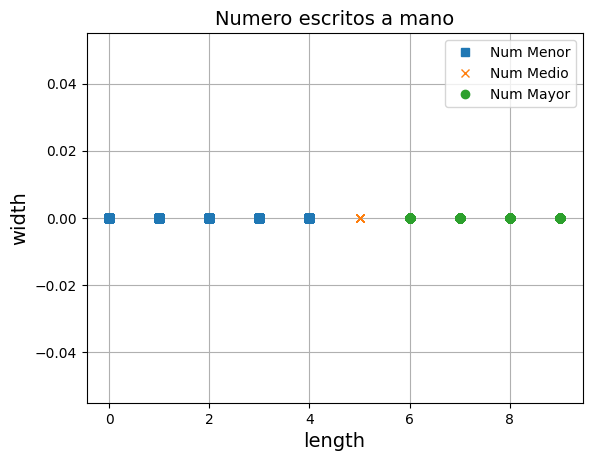

In [ ]:
plt.plot(X_df[y_df==0, 0], X_df[y_df==0, 1], 's', label="Num Menor")
plt.plot(X_df[y_df==1, 0], X_df[y_df==1, 1], 'x', label="Num Medio")
plt.plot(X_df[y_df==2, 0], X_df[y_df==2, 1], 'o', label="Num Mayor")
plt.grid()
plt.legend()
plt.xlabel('length', fontsize=14)
plt.ylabel('width', fontsize=14)
plt.title("Numero escritos a mano", fontsize=14)
plt.show()

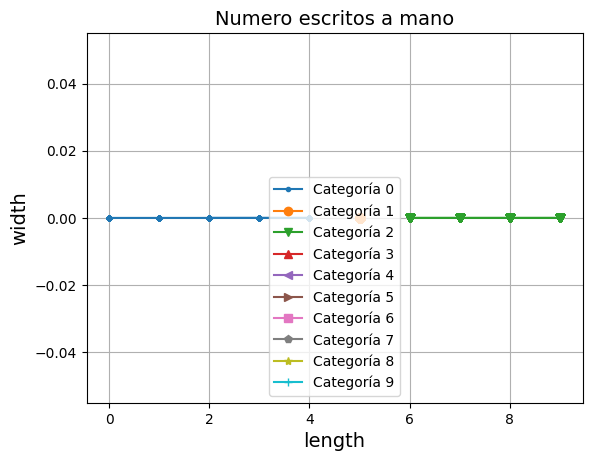

In [ ]:
for i in range(10):
  # Use a list of valid markers and access them using the index
  markers = ['.', 'o', 'v', '^', '<', '>', 's', 'p', '*', '+']
  plt.plot(X_df[y_df==i, 0], X_df[y_df==i, 1], marker=markers[i], label=f'Categoría {i}')

plt.grid()
plt.legend()
plt.xlabel('length', fontsize=14)
plt.ylabel('width', fontsize=14)
plt.title("Numero escritos a mano", fontsize=14)
plt.show()

### TSNE
**t-SNE (t-distributed Stochastic Neighbor Embedding)**

Es una libreria en Python se utiliza para la reducción de dimensionalidad no linea.
es particularmente útil para visualizar datos en 2D o 3D y es excelente para encontrar estructuras no lineales en los datos de alta dimensionalidad.

Se enfoca en mantener la estructura, intenta mantener los puntos de datos que sean algo similares cerca de otros

In [ ]:
from sklearn.manifold import TSNE

Asignamos los valores de x2 y2 que vamos a utilizar, para probar. Por eso no utilizamos nuestras variables originales

In [ ]:
X2 = data.drop(columns=['label']).values
y2 = data['label'].values

`n_components=2:`
 Se especifica que se quiere reducir la dimensionalidad a 2 componentes (2D).

`perplexity=30:` Controla el tamaño de los vecindarios locales. Un valor típico está entre 5 y 50.
n_iter=1000: Número máximo de iteraciones para el algoritmo.

`random_state=42:` Se establece una semilla para la generación de números aleatorios, lo que garantiza resultados reproducibles.

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne_Org = tsne.fit_transform(X2)

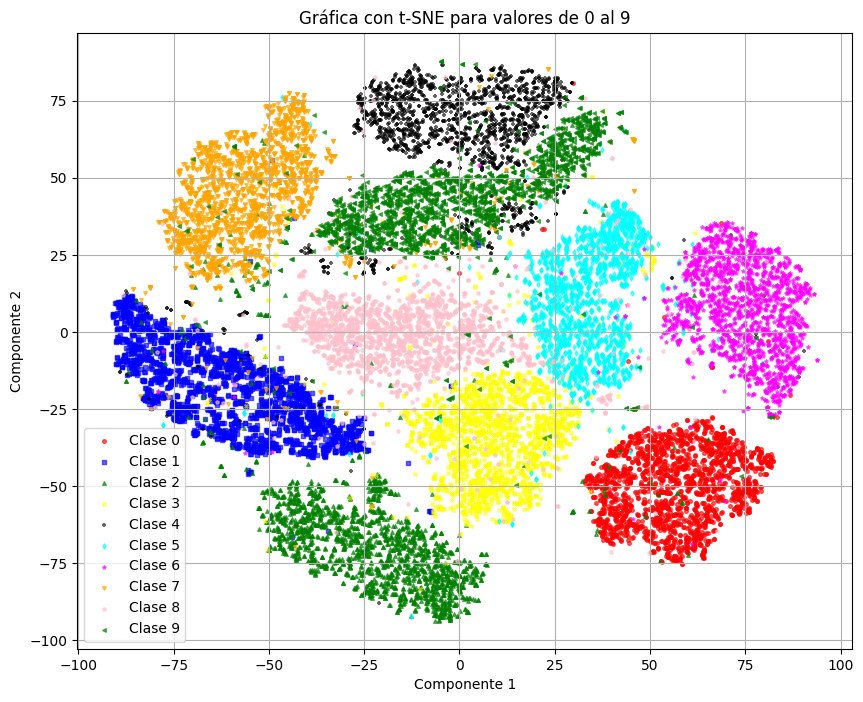

In [ ]:
# Definir los colores y marcadores para las 10 clases
colores = ['red', 'blue', 'green', 'yellow', 'black', 'cyan', 'magenta', 'orange', 'pink', 'green']  # Asegúrate de tener suficientes colores
marcadores = ['o', 's', '^', 'x', '+', 'd', '*', 'v', 'p', '<']  # Asegúrate de tener suficientes marcadores

# Gráfica para las 10 clases (0 al 9)
plt.figure(figsize=(10, 8))
for clase in np.unique(y2):
    plt.scatter(X_tsne_Org[y2 == clase, 0], X_tsne_Org[y2 == clase, 1],
                label=f'Clase {clase}', alpha=0.6, s=7,
                c=colores[clase], marker=marcadores[clase])

plt.title('Gráfica con t-SNE para valores de 0 al 9')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.grid(True)
plt.show()


### 2. Duplique los ejemplos del dataset considerando rangos y criterios que garanticen la consistencia del dataset.

In [ ]:
X_df = df.iloc[:20000, 1:].values
y_df = df.iloc[:20000, 0].values

m = y.size
print(X_df.shape)
print(y_df.shape)
#display(data)

(20000, 788)
(20000,)


In [ ]:
data.drop(data.index[20000:], inplace=True)

In [ ]:
print("Tamaño de X original: ", X.shape)
print("Tamaño de y original: ", y.shape)
print("-" *50)
print("Tamaño de X aumentado: ", X_df.shape)
print("Tamaño de y aumentado: ", y_df.shape)

#display(data)

Tamaño de X original:  (20000, 784)
Tamaño de y original:  (20000,)
--------------------------------------------------
Tamaño de X aumentado:  (20000, 788)
Tamaño de y aumentado:  (20000,)



### 1
`def aumentar_filas(data):` La funcion que va a generar el aumento de filas

### 2
 `for i, fila in df_duplicated.iterrows():` que itera a través de las filas de un DataFrame de Pandas llamado df_duplicated.

 `.iterrows():`devuelve una tupla que contiene el índice de la fila y los datos de la fila

`df_duplicated.iterrows():` este método devuelve un iterador que produce pares de (índice, fila) para cada fila en el DataFrame.

`for i, fila in ...:` en cada iteración del bucle, i tomará el valor del índice de la fila actual, y fila será una Serie de Pandas que contiene los valores de esa fila.




In [ ]:
# Convertir el diccionario en un DataFrame
#df = pd.DataFrame(data)

# Función para generar nuevas filas
def aumentar_filas(data):

    df_duplicated = data.copy()
    # Crear una lista para almacenar las nuevas filas

    nuevas_filas = []  # Lista para almacenar las nuevas filas

    for i, fila in df_duplicated.iterrows():
        # Obtener el valor de la primera columna (etiqueta Y)
        Y = fila.iloc[0]

        # Modificar el resto de las columnas (suma o resta de 0.2)
        # Creamos la copia de la fila original
        nueva_fila = fila.copy()

        # Modificamos las columnas a partir de la segunda (sin cambiar la primera)
        # .choice es una función del módulo random de NumPy. Generar una muestra aleatoria de elementos de un array o una secuencia.
        nueva_fila.iloc[1:] = fila.iloc[1:] + np.random.choice([-0.01, 0.01], size=len(fila) - 1) #el -1 excluye la primera columna del DataFrame al momento de generar los nuevos valores aleatorios.

        # Agregar la nueva fila a la lista de nuevas filas, manteniendo la etiqueta Y
        nuevas_filas.append([Y] + list(nueva_fila.iloc[1:]))

    # Convertir la lista de nuevas filas a un DataFrame
    nuevas_filas_df = pd.DataFrame(nuevas_filas, columns=df_duplicated.columns)

    # Concatenar el DataFrame original con el de las nuevas filas
    df_combined = pd.concat([df_duplicated, nuevas_filas_df], ignore_index=True)

    return df_combined

# Aplicar la función para duplicar las filas y generar nuevas
df_aumentado = aumentar_filas(data)

# Mostrar el nuevo DataFrame con las filas aumentadas
#print(df_aumentado)
#display(df_aumentado)
#print(df_aumentado.shape)

### Verificar si existen datos duplicados

Esa línea de código busca filas duplicadasutilizando el método duplicated().

`df_aumentado.duplicated():`
Este método devuelve una Serie booleana con el mismo índice que df_aumentado. Para cada fila, el valor será True si la fila está duplicada (es decir, si es idéntica a una fila anterior), y False en caso contrario.

`duplicated = ...:` El resultado de df_aumentado. Esta variable ahora contiene una Serie booleana que indica qué filas del DataFrame son duplicadas.

In [ ]:
duplicated = df_aumentado.duplicated()
print(duplicated)
print ("-" * 50)

duplicated = df_aumentado.duplicated().any()

if duplicated:
    print("Hay duplicados en el dataset")
else:
    print("No hay duplicados en el dataset")

0        False
1        False
2        False
3        False
4        False
         ...  
39995    False
39996    False
39997    False
39998    False
39999    False
Length: 40000, dtype: bool
--------------------------------------------------
No hay duplicados en el dataset


In [ ]:
# Asignamos valores a X y Y
X= df_aumentado.iloc[:, 1:785].values
y= df_aumentado.iloc[:, 0].values

m_df_Au = y.size

# Comprobamos los tamaños
print("Tamaño de X: ", X.shape)
print("Tamaño de Y: ",  y.shape)

display(df_aumentado)


Tamaño de X:  (40000, 784)
Tamaño de Y:  (40000,)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,9.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,9.0,-0.01,-0.01,-0.01,-0.01,0.01,-0.01,-0.01,-0.01,0.01,...,0.01,0.01,0.01,-0.01,0.01,-0.01,-0.01,-0.01,-0.01,-0.01
39996,5.0,-0.01,-0.01,-0.01,-0.01,0.01,0.01,0.01,0.01,-0.01,...,-0.01,-0.01,-0.01,0.01,0.01,0.01,-0.01,0.01,-0.01,-0.01
39997,1.0,0.01,0.01,-0.01,-0.01,-0.01,-0.01,0.01,0.01,-0.01,...,-0.01,-0.01,0.01,0.01,-0.01,0.01,0.01,0.01,0.01,0.01
39998,4.0,-0.01,0.01,-0.01,0.01,-0.01,0.01,0.01,0.01,0.01,...,-0.01,0.01,0.01,0.01,-0.01,0.01,0.01,-0.01,-0.01,0.01


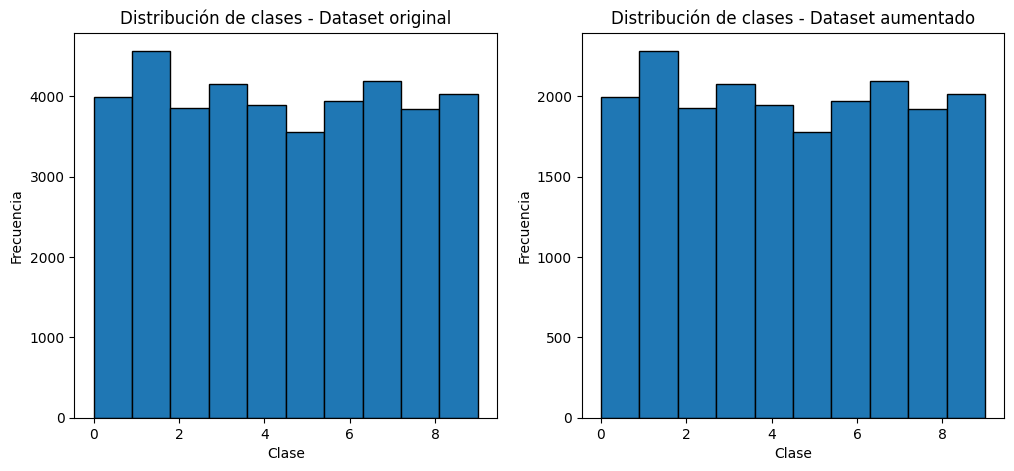

Estadísticas descriptivas - Dataset original:
                 0             1             2             3             4    \
count  40000.000000  40000.000000  4.000000e+04  40000.000000  40000.000000   
mean       0.000051      0.000046 -5.000000e-07     -0.000020      0.000007   
std        0.007071      0.007071  7.071156e-03      0.007071      0.007071   
min       -0.010000     -0.010000 -1.000000e-02     -0.010000     -0.010000   
25%        0.000000      0.000000 -1.000000e-02     -0.010000      0.000000   
50%        0.000000      0.000000  0.000000e+00      0.000000      0.000000   
75%        0.010000      0.010000  0.000000e+00      0.000000      0.010000   
max        0.010000      0.010000  1.000000e-02      0.010000      0.010000   

                5             6             7             8             9    \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.000037     -0.000013      0.000013      0.000017      0.000021   
std 

"# 3. Correlación (ejemplo con las primeras 10 características)\nnum_features = 10\noriginal_corr = np.corrcoef(X[:, :num_features], rowvar=False)\naugmented_corr = np.corrcoef(X_df[:, :num_features], rowvar=False)\n\nplt.figure(figsize=(10, 5))\n\nplt.subplot(1, 2, 1)\nplt.imshow(original_corr, cmap='viridis')\nplt.title('Correlación - Dataset original')\nplt.colorbar()\n\nplt.subplot(1, 2, 2)\nplt.imshow(augmented_corr, cmap='viridis')\nplt.title('Correlación - Dataset aumentado')\nplt.colorbar()\n\nplt.show()"

In [ ]:
# 1. Comparar la distribución de las clases
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(y, bins=10, edgecolor='black')
plt.title('Distribución de clases - Dataset original')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(y_df, bins=10, edgecolor='black')
plt.title('Distribución de clases - Dataset aumentado')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

plt.show()

# 2. Comparar estadísticas descriptivas
original_stats = pd.DataFrame(X).describe()
augmented_stats = pd.DataFrame(X_df).describe()

print("Estadísticas descriptivas - Dataset original:\n", original_stats)
print("\nEstadísticas descriptivas - Dataset aumentado:\n", augmented_stats)

"""# 3. Correlación (ejemplo con las primeras 10 características)
num_features = 10
original_corr = np.corrcoef(X[:, :num_features], rowvar=False)
augmented_corr = np.corrcoef(X_df[:, :num_features], rowvar=False)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_corr, cmap='viridis')
plt.title('Correlación - Dataset original')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(augmented_corr, cmap='viridis')
plt.title('Correlación - Dataset aumentado')
plt.colorbar()

plt.show()"""

### PUNTO 4 --Dividir los datos del dataset sintético en datos de entrenamiento y prueba

`len(df_aumentado):` Esta función devuelve el número de filas en el DataFrame df_aumentado.

`0.8 * ...:` Se multiplica el número de filas por 0.8, lo que significa que el 80% de los datos se utilizarán para entrenamiento.



### Preprocesamiento de datos
Evitamos que los datos sean de otro tipo numerico

In [ ]:
def convertir_a_numerico(dataset):
  for columna in dataset.columns:
    if dataset[columna].dtype == 'object' or dataset[columna].dtype == 'str':
      valores_unicos = {}
      contador = 0
      for valor in dataset[columna]:
        if valor not in valores_unicos:
          valores_unicos[valor] = contador
          contador += 1
      dataset[columna] = dataset[columna].map(valores_unicos)
  return dataset

#df_aumentado = convertir_a_numerico(df_aumentado)
#display(df_aumentado)

In [ ]:
df_aumentado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 785 entries, label to pixel783
dtypes: float64(785)
memory usage: 239.6 MB


In [ ]:
# Calcula el índice que separa los conjuntos de entrenamiento y prueba
split_index = int(0.8 * len(df_aumentado))

# Divide el DataFrame en conjuntos de entrenamiento y prueba
train_df = df_aumentado[:split_index]
test_df = df_aumentado[split_index:]

# Obtén las características (X) y las etiquetas (y) para ambos conjuntos
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (32000, 784)
Tamaño de y_train: (32000,)
Tamaño de X_test: (8000, 784)
Tamaño de y_test: (8000,)


In [ ]:
conteo_clases = data['label'].value_counts()
print(conteo_clases)


conteo_clases = df_aumentado['label'].value_counts()
print(conteo_clases)
#df_aumentado

label
1    2281
7    2093
3    2076
9    2014
0    1994
6    1971
4    1945
2    1929
8    1922
5    1775
Name: count, dtype: int64
label
1.0    4562
7.0    4186
3.0    4152
9.0    4028
0.0    3988
6.0    3942
4.0    3890
2.0    3858
8.0    3844
5.0    3550
Name: count, dtype: int64


### Visualización de los datos

Creamos la función **displayData** , que nos servira para poder representar gráficamente las dimensiones de las imágenes de tamaño 28x28 pixeles.

`int(np.round(np.sqrt(n))):` Esta expresión calcula la raíz cuadrada del número de elementos (n) en cada ejemplo, la redondea al entero más cercano y la convierte a un entero. Esto se utiliza para determinar el ancho de cada imagen asumiendo que son cuadradas.


In [ ]:
#ORIGINAL
def displayData(X, example_width=None, figsize=(10, 10)):

    X = np.array(X)  # Convertir a arreglo de numpy

    # Calcula filas, columnas
    if X.ndim == 2:
        m, n = X.shape # es una matriz
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional - Vector
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Calcula el numero de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m))) #.floor s una función de NumPy, que redondea un número al entero inferior más cercano.
    display_cols = int(np.ceil(m / display_rows)) #redondea un número al entero superior más cercano.

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        # Check if the index is within bounds
        if i < m:
            ax.imshow(X[i].reshape(example_width, example_width, order='C'),
                      cmap='Greys', extent=[0, 1, 0, 1], aspect='equal', origin='upper')
        ax.axis('off') #Oculta los ejes de la subtrama.

# PUNTO 3
Crear una grafica representativa de los datos del dataset inicial y otra con los datos del dataset sintético generado. VISUALIZACION DE DATOS “IMAGENES”

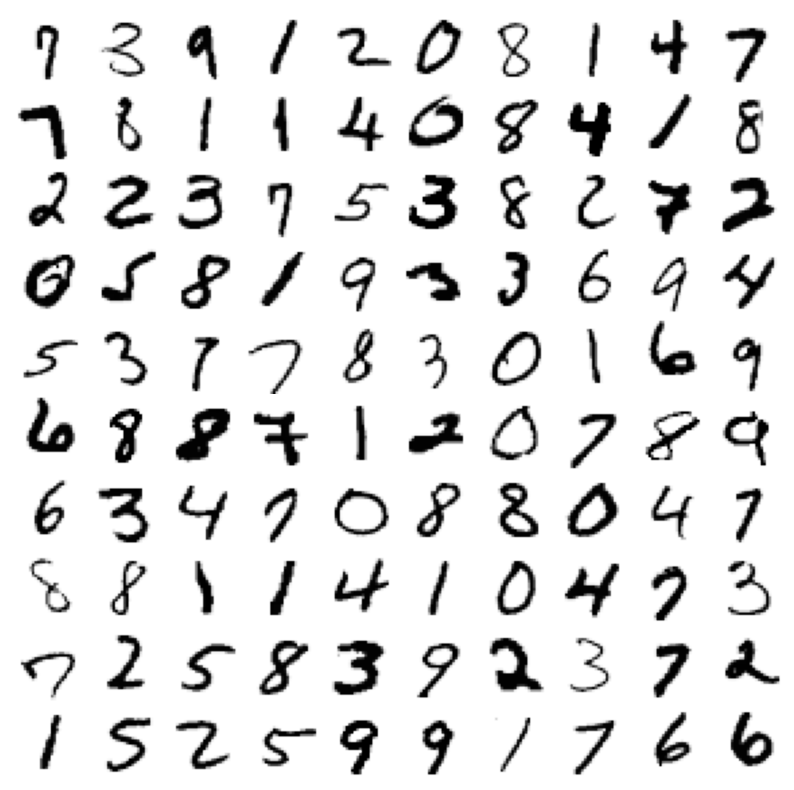

In [ ]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
X_img = X[rand_indices, :]

displayData(X_img)

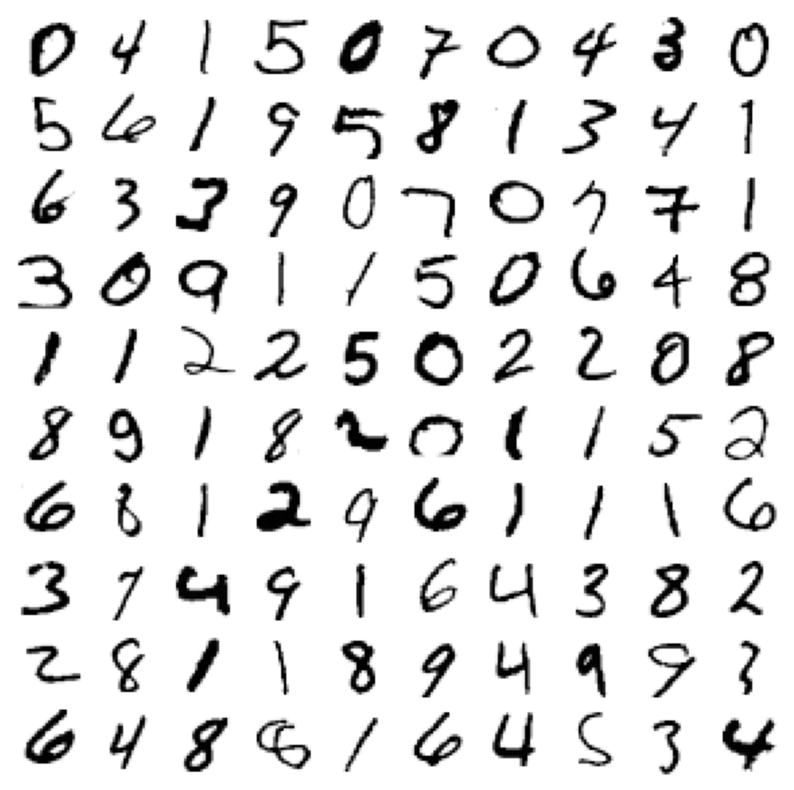

In [ ]:
"""#Imprimimos los datos sinteticos
rand_indices = np.random.choice(m, 100, replace=False)
XR_img = X_upsampled[rand_indices, :]

displayData(XR_img)"""
rand_indices = np.random.choice(m, 100, replace=False)
X_img = X_train[rand_indices, :]

displayData(X_img)

Text(0, 0.5, 'Etiqueta')

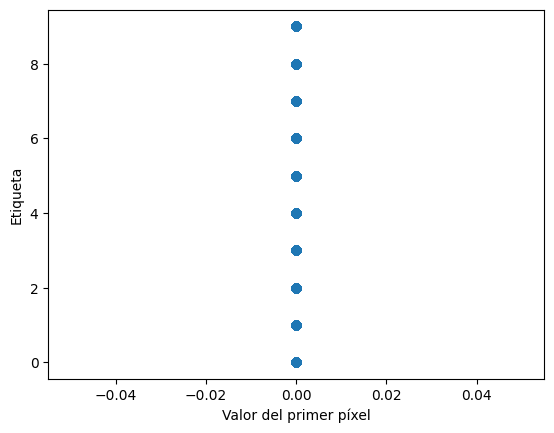

In [ ]:
plt.scatter(X_df[:, 0], y_df)
plt.xlabel('Valor del primer píxel')
plt.ylabel('Etiqueta')

### 1.2 Vectorización de regresión logística

En este caso tenemos 25 clasespor eso se utilizará múltiples modelos de regresión logística uno contra todos para construir un clasificador de clases múltiples. Dado que hay 25 clases, deberá entrenar 25 clasificadores de regresión logística separados.



Para probar la regresión logística vectorizada, se usara datos personalizados como se definen a continuación.

`np.ones((5, 1)):` Crea una matriz de 5 filas y 1 columna llena de unos. Esta columna se utilizará para el término de sesgo (intercepto) en la regresión logística.


**Sesgo, Intercepto**-- Permite que la función sigmoide se desplace horizontalmente, lo que influye en el punto de decisión para la clasificación.

`.reshape(5, 3, order='F'):` Cambia la forma del array a una matriz de 5 filas y 3 columnas. El argumento order='F' especifica que el array se rellene en orden de columnas (Fortran-style).


In [ ]:
# valores de prueba para los parámetros theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# valores de prueba para las entradas
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)

# valores de testeo para las etiquetas
y_t = np.array([1, 0, 1, 0, 1])

# valores de testeo para el parametro de regularizacion
lambda_t = 3


#### Vectorización de la funcion de costo
Para esta vectorizacion creamos la función de la sigmoide.

La función sigmoide toma un valor de entrada z (que puede ser un número o un array) y lo transforma en un valor de salida entre 0 y 1. La fórmula matemática es: `1.0 / (1.0 + np.exp(-z))`




In [ ]:
# convertir cualquier valor de entrada en un valor de salida entre 0 y 1.
def sigmoid(z):

    #z = np.clip(z, -500, 500)
    return 1.0 / (1.0 + np.exp(-z))

La función de costo utilizada es `lrCostFunction`, que calcula el costo y la gradiente de la regresión logística regularizada.

`J:` El costo de la regresión logística regularizada. Este valor representa qué tan bien se ajusta el modelo a los datos de entrenamiento, teniendo en cuenta la regularización.

`grad:` El gradiente de la función de costo. Este valor indica la dirección en la que se deben ajustar los parámetros del modelo (theta) para minimizar el costo.



In [ ]:
#Funcion de costo y gradiente REVISAR VALORES DE X-Y
def lrCostFunction(theta, X, y, lambda_):
    m = y.size #num ejemplos

    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    #calcula el producto punto entre las características (X) y los parámetros del modelo (theta).
    h = sigmoid(X.dot(theta.T))

    # Evitar valores de h que sean 0 o 1
    epsilon = 1e-10
    h = np.clip(h, epsilon, 1 - epsilon) #Asegura que los valores de h estén dentro del rango

    temp = theta.copy()
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    #lambda se refiere al parámetro de regularización.

    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad


#### 1.2.3 Vectorización regularizada de la regresión logística

Añadimos regularización a la función de costo.
estas líneas evalúan el rendimiento del modelo de regresión logística con los parámetros y datos proporcionados, y muestran el costo resultante.


In [ ]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Costo: {:.6f}'.format(J))


Costo: 2.534819


Este código muestra los gradientes calculados para cada parámetro del modelo, lo que es útil para entender cómo se está actualizando el modelo durante el entrenamiento.

Se utiliza para encontrar los parámetros del modelo que minimizan la función de costo.

In [ ]:
# Función de descenso por gradiente
def descensoGradiente(theta, X, y, alpha, num_iters, lambda_):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(np.dot(X, theta))  # Asegura que X.dot(theta) sea compatible con np.exp
        #h = np.clip(h, 1e-15, 1 - 1e-15)  # Evitar valores extremos para la función de coste

        gradient = (alpha / m) * np.dot((h - y), X)
        theta = theta - gradient

        J, _ = lrCostFunction(theta, X, y, lambda_)
        J_history.append(J)

    return theta, J_history

In [ ]:
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (32000, 784)
Tamaño de y_train: (32000,)
Tamaño de X_test: (8000, 784)
Tamaño de y_test: (8000,)


### PASO 5 "Entrenamiento"-- Entrenar el modelo utilizando varios modelos de regresión logística por separado, considerando el número de clases que se vinculan al dataset elegido.


En **Pandas**, `.unique()` es un método que se utiliza para encontrar los valores únicos en una Serie o en un DataFrame.



In [ ]:
# Parámetros de entrenamiento
alpha = 0.001  # Tasa de aprendizaje
num_iters = 300  # Número de iteraciones
lambda_ = 0.01  # Parámetro de regularización

# Obtener las clases únicas del dataset

#classes = np.unique(y_train)
classes = np.unique(y_train) [:5]
print(classes)

models = {}  # Diccionario para almacenar los modelos entrenados
cost_histories = {}
# Entrenar un modelo de regresión logística para cada clase (One-vs-All)
# Entrenamiento del modelo con la nueva función sigmoide


[0. 1. 2. 3. 4.]


En este entrenamiento sacamos con un for el valor de costo de acuerdo a la etiqueta que pertenece

In [ ]:
for contador in classes:
    print(f"Etiqueta: {contador}")
    y_binary = (y_train == contador).astype(int)  # Crear etiquetas binarias
    theta = np.zeros(X_train.shape[1], dtype=np.float64)  # Inicializar theta como array de Numpy con tipo flotante
    theta, cost_history = descensoGradiente(theta, X_train, y_binary, alpha, num_iters, lambda_)
    models[contador] = theta  # Guardar el modelo entrenado
    cost_histories[contador] = cost_history  # Guardar el historial de costos para la clase
    print(f"Coste final para la etiqueta {contador}: {cost_history[-1]}")
    print("-" * 80)

Etiqueta: 0.0
Coste final para la etiqueta 0.0: 0.6931220811001036
--------------------------------------------------------------------------------
Etiqueta: 1.0
Coste final para la etiqueta 1.0: 0.6931168399521669
--------------------------------------------------------------------------------
Etiqueta: 2.0
Coste final para la etiqueta 2.0: 0.6931207083776924
--------------------------------------------------------------------------------
Etiqueta: 3.0
Coste final para la etiqueta 3.0: 0.6931217103973614
--------------------------------------------------------------------------------
Etiqueta: 4.0
Coste final para la etiqueta 4.0: 0.6931191820355875
--------------------------------------------------------------------------------


In [ ]:
classes = np.unique(y_train) [5:]
for contador in classes:
    print(f"Etiqueta: {contador}")
    y_binary = (y_train == contador).astype(int)  # Crear etiquetas binarias
    theta = np.zeros(X_train.shape[1], dtype=np.float64)  # Inicializar theta como array de Numpy con tipo flotante
    theta, cost_history = descensoGradiente(theta, X_train, y_binary, alpha, num_iters, lambda_)
    models[contador] = theta  # Guardar el modelo entrenado
    cost_histories[contador] = cost_history  # Guardar el historial de costos para la clase
    print(f"Coste final para la etiqueta {contador}: {cost_history[-1]}")
    print("-" * 80)

Etiqueta: 5.0
Coste final para la etiqueta 5.0: 0.6931183069913674
--------------------------------------------------------------------------------
Etiqueta: 6.0
Coste final para la etiqueta 6.0: 0.693120505330832
--------------------------------------------------------------------------------
Etiqueta: 7.0
Coste final para la etiqueta 7.0: 0.6931194480110044
--------------------------------------------------------------------------------
Etiqueta: 8.0
Coste final para la etiqueta 8.0: 0.6931220261235321
--------------------------------------------------------------------------------
Etiqueta: 9.0
Coste final para la etiqueta 9.0: 0.693120512223316
--------------------------------------------------------------------------------


### Utilizacion de softmax

In [ ]:
"""def softmax(z):
    # Restar el máximo de z para evitar desbordamiento numérico
    z -= np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)"""

### Clasificacion One-vs-all - PASO 5
*Entrenar el modelo utilizando varios modelos de regresión logística por separado, considerando el número de clases que se vinculan al dataset elegido.*

CONCEPTO

Entrenar varios clasificadores de regresión logística regularizados, uno para cada clase en el conjunto de datos.

Además, se utilizará una función para visualizar el costo.

También haremos uso de la función para graficar el costo.







In [ ]:
def oneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    X = np.concatenate([np.ones((m, 1)), X], axis=1)  # Añadir columna de unos para el término de sesgo

    cost_histories = [[] for _ in range(num_labels)]  # Lista de listas para almacenar el costo por iteración para cada clase

    for c in range(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 100, 'disp': False}

        # Función callback para almacenar el costo en cada iteración
        def callback(theta):
            cost, _ = lrCostFunction(theta, X, (y == c), lambda_)
            cost_histories[c].append(cost)

        #encontrar los parámetros óptimos (theta) para la regresión logística regularizada.
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                args=(X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                callback=callback,  # Usar el callback aquí
                                options=options)

        all_theta[c] = res.x

        print(f'Theta para la clase {c}: {res.x}')

    return all_theta, cost_histories

In [ ]:
#Imprimimos los valores de theta
for i in range(1, 10): # Itera del 1 al 10
  print(f"Clasificador {i}: {models[i]}")
  print("-" * 120)

Clasificador 1: [-1.06702068e-10  1.59375552e-06 -2.99989147e-06  8.43837870e-07
 -1.87495625e-06 -2.53119543e-06  5.62482590e-06  1.03119633e-06
 -5.81242384e-06 -3.37499657e-06 -8.53099753e-06 -5.06234909e-06
 -2.82158862e-06 -1.53380162e-06  4.10943180e-06  5.43672280e-06
 -3.28115136e-06 -5.81238159e-06 -1.31249542e-06  9.37074682e-08
  7.40600932e-06 -1.05934541e-05 -6.56173479e-07  1.87458970e-07
 -5.06239804e-06 -6.56240450e-06 -7.49926799e-07 -7.50137683e-07
  6.09377682e-06  2.43752791e-06  1.03127435e-06  4.03125306e-06
 -4.68752632e-06  2.24943362e-06  7.27244823e-06 -4.03859820e-06
 -3.60602806e-06 -2.96729875e-08  3.32936184e-06  4.52494310e-06
  4.31768427e-06 -5.09525622e-06 -2.48119555e-06  3.72282369e-06
  2.26254922e-06 -8.43631481e-06 -1.08605482e-06  7.40378347e-07
 -1.46283192e-06  2.83455666e-06 -4.35473860e-06  2.69024294e-06
  2.71872840e-06 -3.46865331e-06 -1.12496701e-06  1.59370451e-06
 -8.24990093e-06 -6.65606617e-06 -1.40623453e-05  8.06232402e-06
  1.58528

In [ ]:
#Agragamos valor a lamnda
lambda_ = 0.0001
#Llamamos a la funcion
all_theta, cost_histories  = oneVsAll(X, y, num_labels, lambda_)


Theta para la clase 0: [-4.53531439e+00  2.79063557e+00  2.99642807e+00 -3.09696051e+00
 -3.94577610e+00 -1.97094624e+00  1.97124797e+00  7.78370957e-02
 -5.30521966e+00  2.85229671e+00  3.25250843e+00 -2.37951326e+00
 -1.18819785e+00  4.07610400e+00 -4.65570483e+00 -9.80956458e-01
  2.77503266e+00 -1.14091064e-01  2.81927704e+00 -4.69026823e+00
  7.48479798e-01  3.71604329e+00 -6.01370689e+00 -1.55994947e-01
 -2.74465581e+00  7.67400102e+00  9.88454036e-01 -1.67021736e+00
  2.15445817e+00 -1.37296196e-02 -3.83075341e+00  3.41849839e+00
 -3.07585302e+00 -6.11325749e+00 -5.03613375e+00 -4.67508269e-01
 -5.54365834e+00 -1.95673260e+00  3.59844985e+00  4.98810313e+00
 -4.55536662e+00  4.77801486e+00  1.50638088e+00  1.21478458e+00
 -1.34063248e+00  1.61916147e+00  1.01552130e+00  1.92965354e+00
  1.72305039e+00 -4.24540228e+00  3.41238289e+00 -8.35638863e+00
  1.47367253e+00  1.03597586e+01 -2.98405286e+00  3.15926749e+00
 -4.51779277e+00 -1.14461950e+01 -3.09013545e+00 -6.28358592e+00
 -

#### Gráficar COSTO


In [ ]:
def plot_cost(cost_histories): #Función para graficar la evolución del costo a lo largo de las iteraciones.
    plt.figure(figsize=(12, 8))
    for i in range(num_labels):
        plt.plot(cost_histories[i], label=f'Clase {i}')
    plt.xlabel('Número de iteraciones')
    plt.ylabel('Costo')
    plt.title('Costo durante la optimización para cada clase')
    plt.legend()
    plt.show()

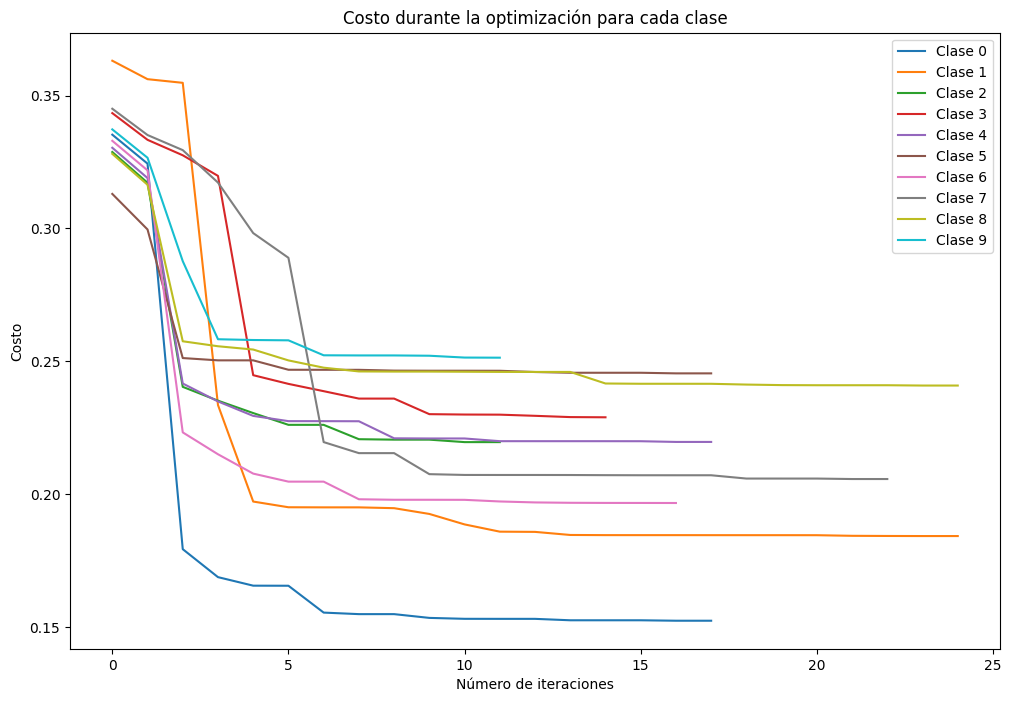

In [ ]:
#Llamamos a la funcion
plot_cost(cost_histories)

### Prediccion One-vs-all


In [ ]:
#Por cada dato de entrada,calcular la probabilidad de que pertenezca a cada clase usando los clasificadores de regresión logística.

def predictOneVsAll(all_theta, X):

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Añade una columna de 1
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

# PASO 10
 Se debe utilizar el dataset de prueba para determinar la efectividad de los modelos desarrollados.




In [ ]:
"""X_test = data_test.iloc[:, 1:785].values
y_test = data_test.iloc[:, 0].values"""
m_test = y_test.size
# Comprobamos los tamaños
print(X_test.shape)
print(y_test.shape)

(8000, 784)
(8000,)


#### Precisión y predicción


In [ ]:
#Precisión con el 80% de los datos.
pred_train = predictOneVsAll(all_theta, X)
print('Precision del entrenamiento: {:.2f}%'.format(np.mean(pred_train == y) * 100))

Precision del entrenamiento: 64.79%


In [ ]:
#Precisión con el 20% de los datos.
pred_test = predictOneVsAll(all_theta, X_test)
print('Precision de prueba: {:.2f}%'.format(np.mean(pred_test == y_test) * 100))

Precision de prueba: 46.08%


## Prueba con datos de test

`.choice` es una función que forma parte del módulo random en NumPy (np.random). Se utiliza para generar una muestra aleatoria de elementos de un array o secuencia.




In [ ]:
#Predicción con los datos de prueba.

def select_random_data(X, y, m, num_samples=50):
  #selecciona aleatoriamente un subconjunto de datos de un conjunto de datos más grande.
    rand_indices = np.random.choice(m, num_samples, replace=False)
    return X[rand_indices, :], y[rand_indices]

In [ ]:
def plot_results(X, y, all_theta): #predicción de clases utilizando un modelo de regresión logística
    X_with_ones = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    #Añade una columna a X para incluir el término de sesgo (intercepto)
    predictions = np.argmax(sigmoid(X_with_ones.dot(all_theta.T)), axis=1) #realiza las predicciones
    print(f'Predicciones: {predictions}')
    print(f'Valores reales: {y}')

    # Graficar los resultados
    displayData(X)

## Original

Predicciones: [9 3 2 1 1 9 1 2 1 9 1 1 8 1 3 3 7 8 9 9 1 1 3 2 0 4 6 4 2 7 3 6 9 3 3 4 2
 3 3 8 7 4 9 1 7 3 0 4 9 3]
Valores reales: [9. 3. 2. 1. 1. 9. 1. 2. 1. 9. 6. 1. 2. 1. 3. 8. 7. 8. 9. 3. 1. 7. 3. 2.
 0. 4. 6. 4. 2. 7. 3. 6. 9. 3. 8. 7. 2. 3. 8. 8. 7. 7. 5. 1. 7. 9. 0. 4.
 9. 5.]


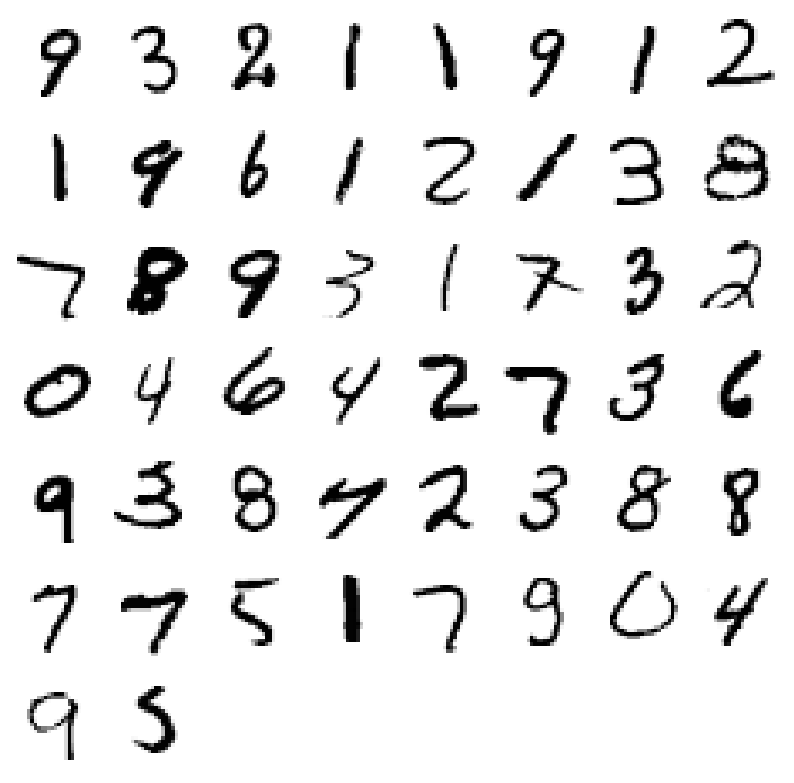

In [ ]:
# Seleccionar datos aleatoriamente
XSint_sample, ySint_sample = select_random_data(X, y, m_test)

# Graficar resultados
plot_results(XSint_sample, ySint_sample, all_theta)

## GRAFICAS
Se debe visualizar de manera obligatorio graficas que muestren el costo y la precisión en relación a los epochs de entrenamiento.

In [ ]:
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)"""

'from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)'

In [ ]:
# Definir el número de etiquetas (0 al 9)
#num_labels = 10
print(num_labels)

10


In [ ]:
# Entrenar el modelo por primera vez
all_theta_1, cost_histories_1 = oneVsAll(X_train, y_train, num_labels, lambda_)

Theta para la clase 0: [-4.37511018e+00 -1.03862183e+00  5.34058742e+00 -4.47973374e+00
 -6.38558022e+00 -4.77752416e+00  4.93277318e+00  3.07023888e-01
 -5.11334743e+00  1.70305459e+00 -3.35412214e-01 -1.39883565e+00
 -4.27342347e+00  2.81412672e+00 -4.50181300e+00 -6.36824398e-01
  2.36734434e+00 -2.43693530e+00 -1.43649796e-01 -4.05805720e+00
  5.25815148e-01  2.87664891e+00 -3.71588214e+00  1.49324509e-01
 -1.64041495e+00  5.25478732e+00 -1.09963714e+00 -2.37580339e-01
  3.09482628e+00  2.05351397e+00 -3.00228870e+00  3.07777055e+00
 -4.13184878e+00 -4.11371881e+00 -2.65589172e+00 -2.69243287e+00
 -3.28534268e+00  3.63016499e+00  4.24218340e+00  7.54236910e+00
 -5.13193561e+00  3.07923189e+00 -2.63040624e+00  3.46477601e+00
 -1.98973531e+00  2.35167837e+00 -1.43835419e+00 -2.44191012e-01
 -1.64841014e-01 -7.21160107e+00  9.98010419e+00 -1.19162849e+01
 -3.30630813e-01  5.57207550e+00 -7.13292092e-01  7.37997508e-01
 -5.39092644e+00 -9.94435779e+00 -7.15160707e-01 -6.81981336e+00
 -

In [ ]:
# Entrenar el modelo por segunda vez (puedes cambiar parámetros si lo necesitas)
all_theta_2, cost_histories_2 = oneVsAll(X_train, y_train, num_labels, lambda_)

Theta para la clase 0: [-4.37511018e+00 -1.03862183e+00  5.34058742e+00 -4.47973374e+00
 -6.38558022e+00 -4.77752416e+00  4.93277318e+00  3.07023888e-01
 -5.11334743e+00  1.70305459e+00 -3.35412214e-01 -1.39883565e+00
 -4.27342347e+00  2.81412672e+00 -4.50181300e+00 -6.36824398e-01
  2.36734434e+00 -2.43693530e+00 -1.43649796e-01 -4.05805720e+00
  5.25815148e-01  2.87664891e+00 -3.71588214e+00  1.49324509e-01
 -1.64041495e+00  5.25478732e+00 -1.09963714e+00 -2.37580339e-01
  3.09482628e+00  2.05351397e+00 -3.00228870e+00  3.07777055e+00
 -4.13184878e+00 -4.11371881e+00 -2.65589172e+00 -2.69243287e+00
 -3.28534268e+00  3.63016499e+00  4.24218340e+00  7.54236910e+00
 -5.13193561e+00  3.07923189e+00 -2.63040624e+00  3.46477601e+00
 -1.98973531e+00  2.35167837e+00 -1.43835419e+00 -2.44191012e-01
 -1.64841014e-01 -7.21160107e+00  9.98010419e+00 -1.19162849e+01
 -3.30630813e-01  5.57207550e+00 -7.13292092e-01  7.37997508e-01
 -5.39092644e+00 -9.94435779e+00 -7.15160707e-01 -6.81981336e+00
 -

In [ ]:
# Entrenar el modelo por tercera vez (puedes cambiar parámetros si lo necesitas)
all_theta_3, cost_histories_3 = oneVsAll(X_train, y_train, num_labels, lambda_)

Theta para la clase 0: [-4.37511018e+00 -1.03862183e+00  5.34058742e+00 -4.47973374e+00
 -6.38558022e+00 -4.77752416e+00  4.93277318e+00  3.07023888e-01
 -5.11334743e+00  1.70305459e+00 -3.35412214e-01 -1.39883565e+00
 -4.27342347e+00  2.81412672e+00 -4.50181300e+00 -6.36824398e-01
  2.36734434e+00 -2.43693530e+00 -1.43649796e-01 -4.05805720e+00
  5.25815148e-01  2.87664891e+00 -3.71588214e+00  1.49324509e-01
 -1.64041495e+00  5.25478732e+00 -1.09963714e+00 -2.37580339e-01
  3.09482628e+00  2.05351397e+00 -3.00228870e+00  3.07777055e+00
 -4.13184878e+00 -4.11371881e+00 -2.65589172e+00 -2.69243287e+00
 -3.28534268e+00  3.63016499e+00  4.24218340e+00  7.54236910e+00
 -5.13193561e+00  3.07923189e+00 -2.63040624e+00  3.46477601e+00
 -1.98973531e+00  2.35167837e+00 -1.43835419e+00 -2.44191012e-01
 -1.64841014e-01 -7.21160107e+00  9.98010419e+00 -1.19162849e+01
 -3.30630813e-01  5.57207550e+00 -7.13292092e-01  7.37997508e-01
 -5.39092644e+00 -9.94435779e+00 -7.15160707e-01 -6.81981336e+00
 -

### Función personalizada para calcular la precisión

`accuracy = accuracy_score_manual(y_true_class, y_pred_class) * 100` se realiza para convertir la precisión de un valor decimal (entre 0 y 1) a un porcentaje (entre 0% y 100%).

Esto se hace para que la precisión sea más fácil de interpretar y comprender. En lugar de mostrar un valor como 0.85, se muestra como 85%, lo que indica que el modelo tiene una precisión del 85% para esa clase.




Tamaño del conjunto de entrenamiento: (32000, 784)
Tamaño del conjunto de prueba: (8000, 784)
Primera precisión global en el conjunto de entrenamiento: 70.90%
Primera precisión global en el conjunto de prueba: 37.86%

Precisión por clase en el conjunto de entrenamiento:
Precisión para la clase 0: 96.16%
Precisión para la clase 1: 93.79%
Precisión para la clase 2: 94.27%
Precisión para la clase 3: 93.06%
Precisión para la clase 4: 94.09%
Precisión para la clase 5: 93.62%
Precisión para la clase 6: 94.96%
Precisión para la clase 7: 94.46%
Precisión para la clase 8: 93.88%
Precisión para la clase 9: 93.50%

Precisión por clase en el conjunto de prueba:
Precisión para la clase 0: 89.25%
Precisión para la clase 1: 87.58%
Precisión para la clase 2: 87.48%
Precisión para la clase 3: 86.33%
Precisión para la clase 4: 87.61%
Precisión para la clase 5: 87.74%
Precisión para la clase 6: 87.59%
Precisión para la clase 7: 87.48%
Precisión para la clase 8: 87.49%
Precisión para la clase 9: 87.20%


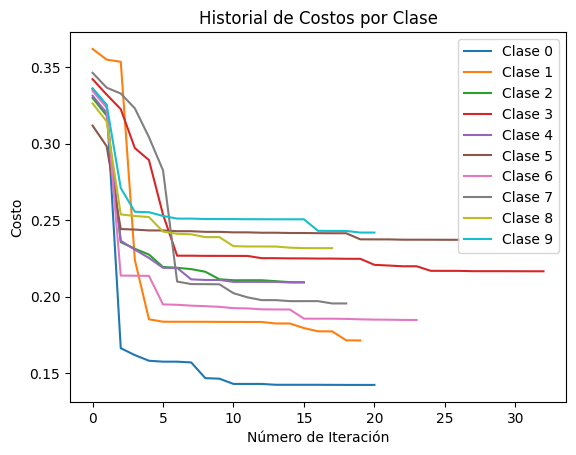


Realizando un segundo entrenamiento con nuevos datos...
Segunda precisión global en el conjunto de entrenamiento: 70.90%
Segunda precisión global en el conjunto de prueba: 37.86%

Precisión por clase en el conjunto de entrenamiento (segunda iteración):
Precisión para la clase 0: 96.16%
Precisión para la clase 1: 93.79%
Precisión para la clase 2: 94.27%
Precisión para la clase 3: 93.06%
Precisión para la clase 4: 94.09%
Precisión para la clase 5: 93.62%
Precisión para la clase 6: 94.96%
Precisión para la clase 7: 94.46%
Precisión para la clase 8: 93.88%
Precisión para la clase 9: 93.50%

Precisión por clase en el conjunto de prueba (segunda iteración):
Precisión para la clase 0: 89.25%
Precisión para la clase 1: 87.58%
Precisión para la clase 2: 87.48%
Precisión para la clase 3: 86.33%
Precisión para la clase 4: 87.61%
Precisión para la clase 5: 87.74%
Precisión para la clase 6: 87.59%
Precisión para la clase 7: 87.48%
Precisión para la clase 8: 87.49%
Precisión para la clase 9: 87.20%

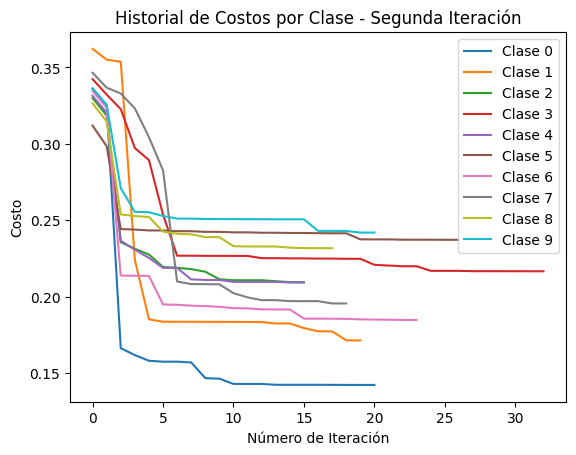


Realizando un tecer entrenamiento con nuevos datos...
Tercera precisión global en el conjunto de entrenamiento: 70.90%
Tercera precisión global en el conjunto de prueba: 37.86%

Precisión por clase en el conjunto de entrenamiento (tercera iteración):
Precisión para la clase 0: 96.16%
Precisión para la clase 1: 93.79%
Precisión para la clase 2: 94.27%
Precisión para la clase 3: 93.06%
Precisión para la clase 4: 94.09%
Precisión para la clase 5: 93.62%
Precisión para la clase 6: 94.96%
Precisión para la clase 7: 94.46%
Precisión para la clase 8: 93.88%
Precisión para la clase 9: 93.50%

Precisión por clase en el conjunto de prueba (tercera iteración):
Precisión para la clase 0: 89.25%
Precisión para la clase 1: 87.58%
Precisión para la clase 2: 87.48%
Precisión para la clase 3: 86.33%
Precisión para la clase 4: 87.61%
Precisión para la clase 5: 87.74%
Precisión para la clase 6: 87.59%
Precisión para la clase 7: 87.48%
Precisión para la clase 8: 87.49%
Precisión para la clase 9: 87.20%


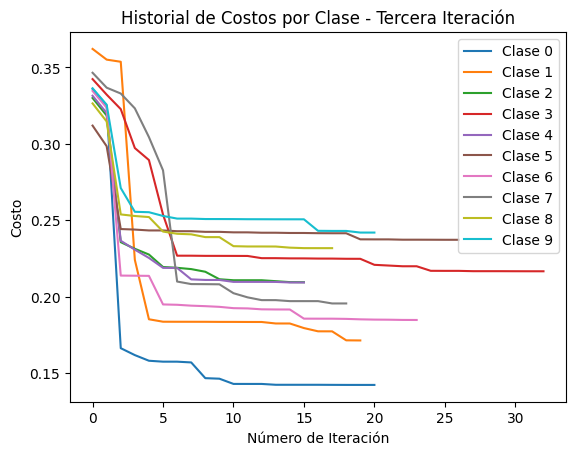

In [ ]:
# Función personalizada para calcular la precisión
def accuracy_score_manual(y_true, y_pred):
    correct = sum(y_true == y_pred) #Sum del número total de predicciones correctas.
    total = len(y_true)
    return correct / total

# Función para calcular la precisión para cada clase
def accuracy_per_class(y_true, y_pred, num_labels):

    #Se crea una lista vacía para almacenar las precisiones de cada clase.
    accuracies = []

    for label in range(num_labels):
        # Filtrar solo las instancias de la clase actual
        y_true_class = (y_true == label)
        y_pred_class = (y_pred == label)
        # Calcular precisión para la clase actual
        accuracy = accuracy_score_manual(y_true_class, y_pred_class) * 100
        accuracies.append(accuracy)
        print(f'Precisión para la clase {label}: {accuracy:.2f}%')
    return accuracies

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

# Entrenar el modelo por primera vez para 10 etiquetas
#all_theta_1, cost_histories_1 = oneVsAll(X_train, y_train, num_labels, lambda_)

# Predecir etiquetas para el conjunto de entrenamiento y prueba
y_pred_train_1 = predictOneVsAll(all_theta_1, X_train)
y_pred_test_1 = predictOneVsAll(all_theta_1, X_test)

# Calcular la precisión GLOBAL en ambos conjuntos usando la función manual
accuracy_train_1 = accuracy_score_manual(y_train, y_pred_train_1) * 100
accuracy_test_1 = accuracy_score_manual(y_test, y_pred_test_1) * 100

print(f'Primera precisión global en el conjunto de entrenamiento: {accuracy_train_1:.2f}%')
print(f'Primera precisión global en el conjunto de prueba: {accuracy_test_1:.2f}%')

# Calcular la precisión por CLASE en el conjunto de entrenamiento y prueba
print("\nPrecisión por clase en el conjunto de entrenamiento:")
accuracy_per_class(y_train, y_pred_train_1, num_labels)

print("\nPrecisión por clase en el conjunto de prueba:")
accuracy_per_class(y_test, y_pred_test_1, num_labels)

# Graficar el historial de costos para la primera iteración (para las 10 clases)
for i in range(num_labels):  # Aquí i va de 0 a 9
    plt.plot(cost_histories_1[i], label=f'Clase {i}')
plt.xlabel('Número de Iteración')
plt.ylabel('Costo')
plt.title('Historial de Costos por Clase')
plt.legend()
plt.show()

# Hacer un segundo entrenamiento
print("\nRealizando un segundo entrenamiento con nuevos datos...")

# Entrenar el modelo por segunda vez (para 10 etiquetas)
#all_theta_2, cost_histories_2 = oneVsAll(X_train, y_train, num_labels, lambda_)

# Predecir etiquetas para el segundo conjunto de entrenamiento y prueba
y_pred_train_2 = predictOneVsAll(all_theta_2, X_train)
y_pred_test_2 = predictOneVsAll(all_theta_2, X_test)

# Calcular la precisión GLOBAL en ambos conjuntos para el segundo entrenamiento usando la función manual
accuracy_train_2 = accuracy_score_manual(y_train, y_pred_train_2) * 100
accuracy_test_2 = accuracy_score_manual(y_test, y_pred_test_2) * 100

print(f'Segunda precisión global en el conjunto de entrenamiento: {accuracy_train_2:.2f}%')
print(f'Segunda precisión global en el conjunto de prueba: {accuracy_test_2:.2f}%')

# Calcular la precisión por clase en el segundo conjunto de entrenamiento y prueba
print("\nPrecisión por clase en el conjunto de entrenamiento (segunda iteración):")
accuracy_per_class(y_train, y_pred_train_2, num_labels)

print("\nPrecisión por clase en el conjunto de prueba (segunda iteración):")
accuracy_per_class(y_test, y_pred_test_2, num_labels)

# Graficar el historial de costos para la segunda iteración (para las 10 clases)
for i in range(num_labels):  # Nuevamente, i va de 0 a 9
    plt.plot(cost_histories_2[i], label=f'Clase {i}')
plt.xlabel('Número de Iteración')
plt.ylabel('Costo')
plt.title('Historial de Costos por Clase - Segunda Iteración')
plt.legend()
plt.show()



# Hacer un TERCER entrenamiento
print("\nRealizando un tecer entrenamiento con nuevos datos...")

# Entrenar el modelo por segunda vez (para 10 etiquetas)
#all_theta_2, cost_histories_2 = oneVsAll(X_train, y_train, num_labels, lambda_)

# Predecir etiquetas para el segundo conjunto de entrenamiento y prueba
y_pred_train_3 = predictOneVsAll(all_theta_3, X_train)
y_pred_test_3 = predictOneVsAll(all_theta_3, X_test)

# Calcular la precisión global en ambos conjuntos para el segundo entrenamiento usando la función manual
accuracy_train_3 = accuracy_score_manual(y_train, y_pred_train_3) * 100
accuracy_test_3 = accuracy_score_manual(y_test, y_pred_test_3) * 100

print(f'Tercera precisión global en el conjunto de entrenamiento: {accuracy_train_3:.2f}%')
print(f'Tercera precisión global en el conjunto de prueba: {accuracy_test_3:.2f}%')

# Calcular la precisión por clase en el segundo conjunto de entrenamiento y prueba
print("\nPrecisión por clase en el conjunto de entrenamiento (tercera iteración):")
accuracy_per_class(y_train, y_pred_train_3, num_labels)

print("\nPrecisión por clase en el conjunto de prueba (tercera iteración):")
accuracy_per_class(y_test, y_pred_test_3, num_labels)

# Graficar el historial de costos para la segunda iteración (para las 10 clases)
for i in range(num_labels):  # Nuevamente, i va de 0 a 9
    plt.plot(cost_histories_3[i], label=f'Clase {i}')
plt.xlabel('Número de Iteración')
plt.ylabel('Costo')
plt.title('Historial de Costos por Clase - Tercera Iteración')
plt.legend()
plt.show()

Tamaño del conjunto de entrenamiento: (32000, 784)
Tamaño del conjunto de prueba: (8000, 784)
Primera precisión en el conjunto de entrenamiento: 71.28%
Primera precisión en el conjunto de prueba: 37.41%


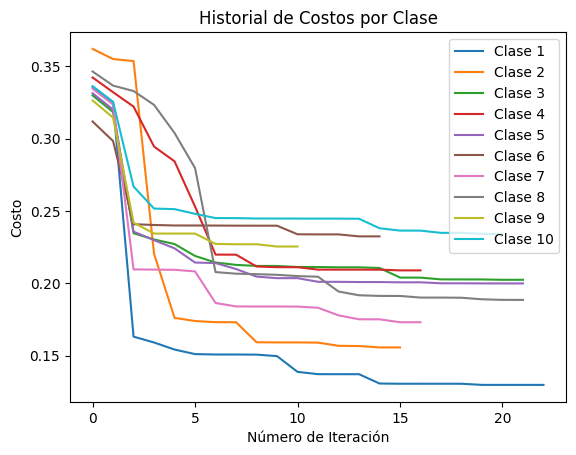

Realizando un segundo entrenamiento con nuevos datos...
Segunda precisión en el conjunto de entrenamiento: 71.28%
Segunda precisión en el conjunto de prueba: 37.41%


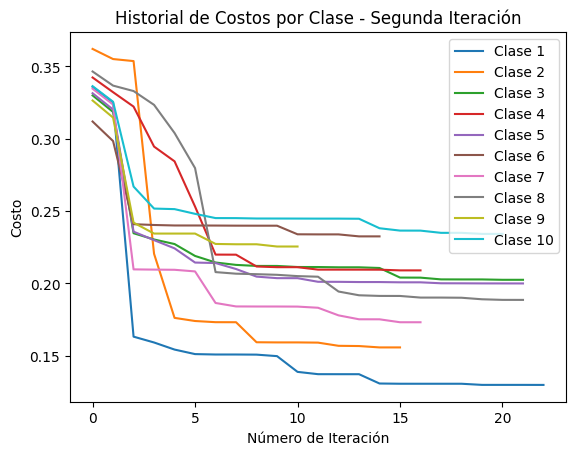

In [ ]:
# Mostrar porcentaje generales--- Función personalizada para calcular la precisión
def accuracy_score_manual(y_true, y_pred):
    correct = sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

# Entrenar el modelo por primera vez
#all_theta_1, cost_histories_1 = oneVsAll(X_train, y_train, num_labels, lambda_)

# Predecir etiquetas para el conjunto de entrenamiento y prueba
y_pred_train_1 = predictOneVsAll(all_theta_1, X_train)
y_pred_test_1 = predictOneVsAll(all_theta_1, X_test)

# Calcular la precisión en ambos conjuntos usando la función manual
accuracy_train_1 = accuracy_score_manual(y_train, y_pred_train_1) * 100
accuracy_test_1 = accuracy_score_manual(y_test, y_pred_test_1) * 100

print(f'Primera precisión en el conjunto de entrenamiento: {accuracy_train_1:.2f}%')
print(f'Primera precisión en el conjunto de prueba: {accuracy_test_1:.2f}%')

# Graficar el historial de costos para la primera iteración
for i in range(num_labels):
    plt.plot(cost_histories_1[i], label=f'Clase {i+1}')
plt.xlabel('Número de Iteración')
plt.ylabel('Costo')
plt.title('Historial de Costos por Clase')
plt.legend()
plt.show()

# Hacer un segundo entrenamiento
print("Realizando un segundo entrenamiento con nuevos datos...")

# Entrenar el modelo por segunda vez (puedes cambiar parámetros si lo necesitas)
#all_theta_2, cost_histories_2 = oneVsAll(X_train, y_train, num_labels, lambda_)

# Predecir etiquetas para el segundo conjunto de entrenamiento y prueba
y_pred_train_2 = predictOneVsAll(all_theta_2, X_train)
y_pred_test_2 = predictOneVsAll(all_theta_2, X_test)

# Calcular la precisión en ambos conjuntos para el segundo entrenamiento usando la función manual
accuracy_train_2 = accuracy_score_manual(y_train, y_pred_train_2) * 100
accuracy_test_2 = accuracy_score_manual(y_test, y_pred_test_2) * 100

print(f'Segunda precisión en el conjunto de entrenamiento: {accuracy_train_2:.2f}%')
print(f'Segunda precisión en el conjunto de prueba: {accuracy_test_2:.2f}%')

# Graficar el historial de costos para la segunda iteración
for i in range(num_labels):
    plt.plot(cost_histories_2[i], label=f'Clase {i+1}')
plt.xlabel('Número de Iteración')
plt.ylabel('Costo')
plt.title('Historial de Costos por Clase - Segunda Iteración')
plt.legend()
plt.show()
